### Experiments with [chat2plot](https://github.com/nyanp/chat2plot)

In [1]:
import sys
!{sys.executable} -m pip install -U chat2plot langchain-community langchain-core langchain-openai

In [2]:
import os
import pandas as pd
from chat2plot import chat2plot
from langchain_openai import ChatOpenAI
from lets_plot import *


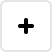
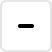
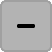
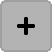
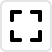
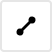
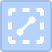
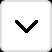
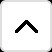
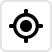
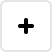
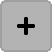
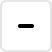
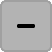
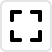
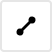
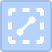
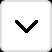
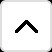
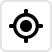

In [3]:
LetsPlot.setup_html()

In [4]:
os.environ["OPENAI_API_KEY"] = input("Type your OpenAI API key: ")

Type your OpenAI API key: 


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

In [6]:
c2p = chat2plot(df, chat=ChatOpenAI())

In [7]:
query = "Average number of city miles per drivetrain"

/home/asmirnov/Applications/miniconda3/envs/lets-plot-experiments/lib/python3.10/site-packages/chat2plot/chat2plot.py:92: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  response = self._chat(self._conversation_history, **kwargs)  # type: ignore
/home/asmirnov/Applications/miniconda3/envs/lets-plot-experiments/lib/python3.10/site-packages/chat2plot/render.py:121: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(s)
/home/asmirnov/Applications/miniconda3/envs/lets-plot-experiments/lib/python3.10/site-packages/chat2plot/render.py:125: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(s, 

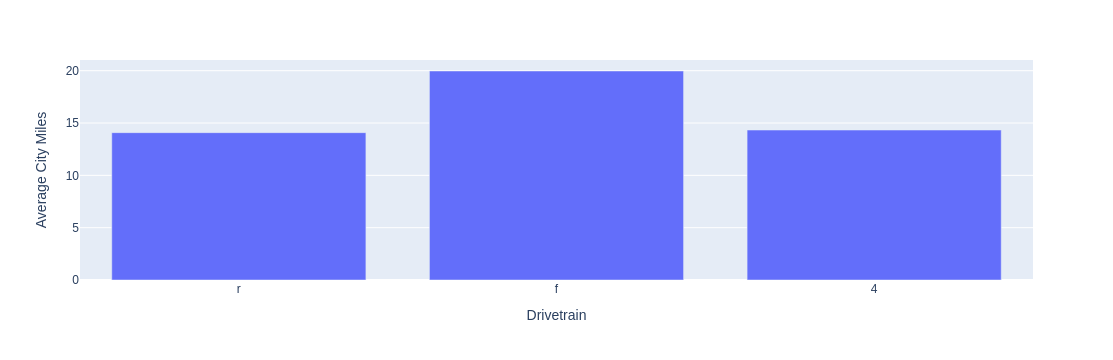

chart_type=<ChartType.BAR: 'bar'> filters=[] x=XAxis(column='drv', bin_size=None, time_unit=None, min_value=None, max_value=None, label='Drivetrain') y=YAxis(column='cty', aggregation=<AggregationType.AVG: 'AVG'>, min_value=None, max_value=None, label='Average City Miles') color=None bar_mode=None sort_criteria=None sort_order=None horizontal=None limit=None
For this task, we need to calculate the average number of city miles (cty) for each drivetrain category (drv). We will use a bar chart to visualize the average number of city miles per drivetrain. No filters need to be applied to the data. We will use the 'drv' column for the x-axis and the 'cty' column for the y-axis with an aggregation of 'AVG' (average).


In [8]:
result = c2p(query)
result.figure.show()
print(result.config)
print(result.explanation)

In [9]:
ggplot(df, aes("drv", "cty")) + stat_summary(geom='bar')